<a href="https://colab.research.google.com/github/istizhraa24/AI.CLASS/blob/main/Eksperimen_IstiZahra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Judul Dataset: Heart Disease Cleveland UCI
Sumber Dataset: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

Datasate ini digunakan untuk memprediksi kemungkinan ketika seseorang mengidap penyakit jantung berdasarkan kolesterol, usia, tekanan darah,serta hasil tes EKG. Tujuannya adalah:

1. Membangun model Machine Learning untuk memprediksi risiko penyakit jantung.
2. Menganalisis faktor-faktor medis yang paling berpengaruh terhadap penyakit jantung.
3. Mendukung sistem deteksi dini penyakit jantung.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
print("Library berhasil diimpor!")


import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np

Library berhasil diimpor!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
!pip install -q kaggle

In [3]:
!mkdir -p ~/.kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cistizahra090","key":"ad5e015082eb66aa98524c0182ab19cf"}'}

In [5]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d cherngs/heart-disease-cleveland-uci
!unzip -o heart-disease-cleveland-uci.zip

Dataset URL: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci
License(s): reddit-api
  0% 0.00/3.33k [00:00<?, ?B/s]
100% 3.33k/3.33k [00:00<00:00, 16.9MB/s]
Archive:  heart-disease-cleveland-uci.zip
  inflating: heart_cleveland_upload.csv  


In [7]:
import pandas as pd

df = pd.read_csv('heart_cleveland_upload.csv')
print("Dataset berhasil dimuat!")
df.head()

Dataset berhasil dimuat!


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [8]:
print("Ukuran dataset:", df.shape)
print("\nInformasi dataset:")
df.info()

Ukuran dataset: (297, 14)

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [9]:
print("\nStatistik deskriptif:")
df.describe()


Statistik deskriptif:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [10]:
print("Jumlah missing values per kolom:")
print(df.isnull().sum())

duplicate_count = df.duplicated().sum()
print(f"\nJumlah data duplikat: {duplicate_count}")


Jumlah missing values per kolom:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

Jumlah data duplikat: 0


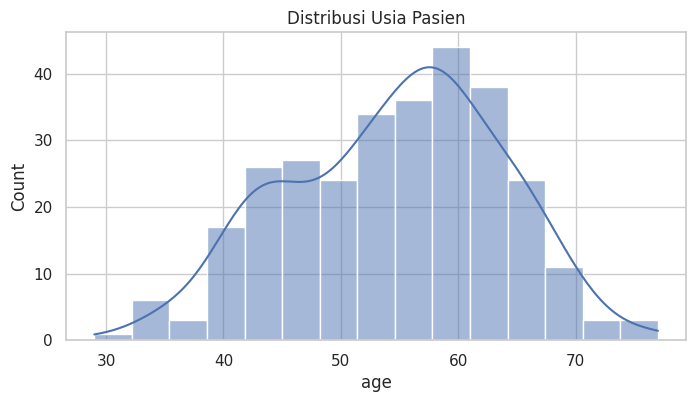

In [11]:
plt.figure(figsize=(8,4))
sns.histplot(df['age'], bins=15, kde=True)
plt.title('Distribusi Usia Pasien')
plt.show()

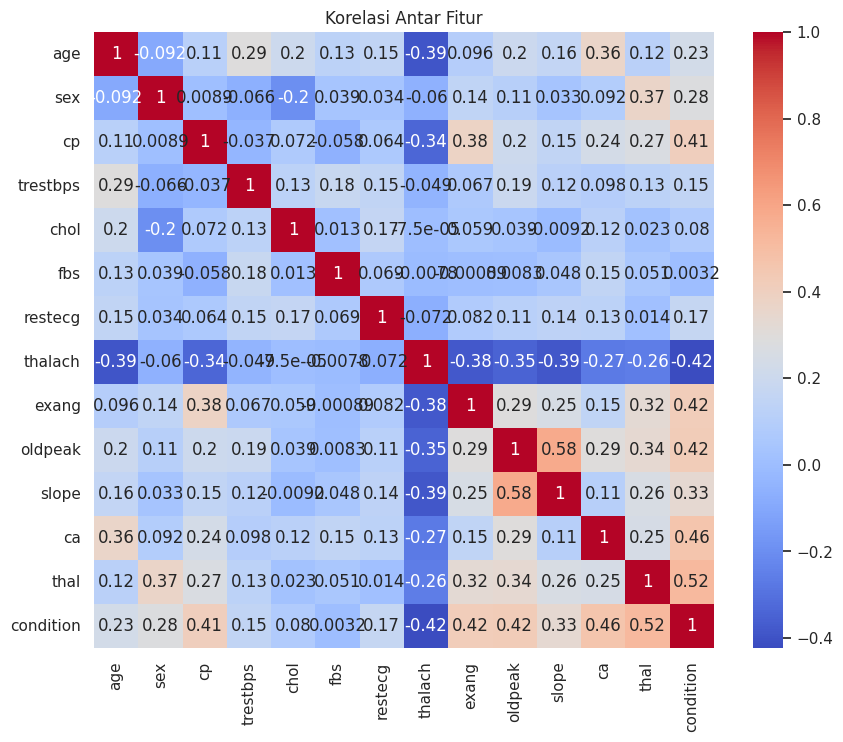

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

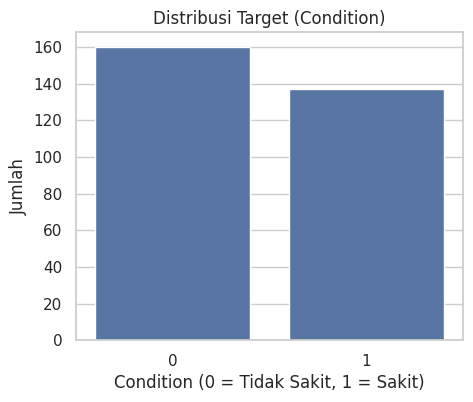

In [13]:
plt.figure(figsize=(5,4))
sns.countplot(x='condition', data=df)
plt.title('Distribusi Target (Condition)')
plt.xlabel('Condition (0 = Tidak Sakit, 1 = Sakit)')
plt.ylabel('Jumlah')
plt.show()

In [14]:
print("\nProporsi Target:")
print(df['condition'].value_counts(normalize=True) * 100)


Proporsi Target:
condition
0    53.872054
1    46.127946
Name: proportion, dtype: float64


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [15]:
import pandas as pd
data = pd.read_csv('heart_cleveland_upload.csv')

print("Jumlah missing values sebelum preprocessing:\n", df.isnull().sum())



Jumlah missing values sebelum preprocessing:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [16]:
# 1️⃣ Cek dan tangani missing values
print("Jumlah missing values sebelum preprocessing:\n", data.isnull().sum())

# Karena dataset ini bersih (tidak ada missing value), kita bisa tetap antisipasi dengan imputasi mean
imputer = SimpleImputer(strategy='mean')
data[data.columns] = imputer.fit_transform(data)

print("\nJumlah missing values sesudah imputasi:\n", data.isnull().sum())

Jumlah missing values sebelum preprocessing:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

Jumlah missing values sesudah imputasi:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [17]:
# 2️⃣ Menghapus data duplikat (jika ada)
before = data.shape[0]
data = data.drop_duplicates()
after = data.shape[0]
print(f"\nJumlah data duplikat yang dihapus: {before - after}")



Jumlah data duplikat yang dihapus: 0


In [18]:
# 3️⃣ Deteksi dan penanganan outlier menggunakan IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Menyaring data di luar batas wajar
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"\nJumlah data setelah menghapus outlier: {data.shape[0]}")


Jumlah data setelah menghapus outlier: 212


In [19]:
# 4️⃣ Encoding data kategorikal (jika ada)
# Dataset ini kebanyakan numerik, tapi kolom 'thal' dan 'cp' bisa dianggap kategorikal.
categorical_cols = ['cp', 'thal', 'slope', 'restecg']
encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_cols = pd.DataFrame(
    encoder.fit_transform(data[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols)
)

# Gabungkan kembali hasil encoding dengan dataset utama
data = pd.concat([data.drop(columns=categorical_cols), encoded_cols], axis=1)

In [20]:
# 5️⃣ Normalisasi fitur numerik
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=['condition']))

# Membuat DataFrame baru dengan data yang sudah dinormalisasi
scaled_df = pd.DataFrame(scaled_data, columns=data.drop(columns=['condition']).columns)
scaled_df['condition'] = data['condition'].values

print("\nData setelah preprocessing:")
print(scaled_df.head())


Data setelah preprocessing:
        age       sex  trestbps      chol  fbs   thalach     exang   oldpeak  \
0  2.274560 -1.394433 -0.549372  0.556246  0.0 -1.326648  1.455214 -0.694931   
1  1.944808 -1.394433  2.131107  1.288280  0.0  0.501964 -0.687184 -0.500442   
2  1.834891  0.717137  1.863059  0.023857  0.0 -0.345442 -0.687184 -0.889420   
3  1.065471 -1.394433  0.790868 -1.085286  0.0  1.260169 -0.687184 -0.889420   
4  0.955554  0.717137 -0.549372  0.822440  0.0 -2.129454 -0.687184  0.472003   

         ca    cp_2.0    cp_3.0  thal_1.0  thal_2.0  slope_1.0  slope_2.0  \
0  0.773758 -0.635589 -1.028714 -0.222497  1.324102  -0.901091   4.494441   
1  2.238372 -0.635589 -1.028714 -0.222497 -0.755229   1.109765  -0.222497   
2 -0.690856 -0.635589 -1.028714 -0.222497 -0.755229  -0.901091  -0.222497   
3  2.238372 -0.635589 -1.028714 -0.222497 -0.755229   1.109765  -0.222497   
4  0.773758 -0.635589 -1.028714 -0.222497 -0.755229  -0.901091  -0.222497   

   restecg_1.0  restecg_2.0

In [21]:
# 6️⃣ Binning (Pengelompokan Data)
# Contoh: Mengelompokkan umur ke dalam 3 kategori
bins = [0, 40, 60, 100]
labels = ['Muda', 'Dewasa', 'Tua']
scaled_df['age_group'] = pd.cut(scaled_df['age'], bins=bins, labels=labels)

# Lihat hasil binning
print("\nContoh hasil pengelompokan umur (binning):")
print(scaled_df[['age', 'age_group']].head())



Contoh hasil pengelompokan umur (binning):
        age age_group
0  2.274560      Muda
1  1.944808      Muda
2  1.834891      Muda
3  1.065471      Muda
4  0.955554      Muda


In [23]:
# Simpan hasil preprocessing ke file CSV
data.to_csv('clean_data.csv', index=False)

print("File 'clean_data.csv' berhasil dibuat!")


File 'clean_data.csv' berhasil dibuat!
